In [1]:
from pathlib import Path
import pandas as pd
from nvi_survey import create_nvi_survey

filepath = (
    Path.cwd() /
    "output" /
    "nvi_2024_analysis_source_2026_2026_20250514.csv"
)
nvi = create_nvi_survey(filepath)

In [10]:
list(
    nvi.answer_key
    [nvi.answer_key["group"] == "Comfortability_Using_Devices_Task"]
    ["question"].drop_duplicates()
)

['I do not feel comfortable doing any of these tasks',
 'Passing a basic computer skills test',
 'Printing and scanning documents',
 'Submitting an online job application',
 'Uploading documents',
 'Using a website builder',
 'Using communication and collaboration tools (Slack, Teams)',
 'Using email applications (Microsoft Outlook, Gmail)',
 'Using Microsoft Office, or Google applications (Word, Excel, PowerPoint, Docs, Sheets, or Slides)',
 'Using photo or video editing software',
 'Using software to analyze data',
 'Using video conferencing software (Zoom, Google Meet)',
 'Writing code']

In [89]:
(100 * nvi.tabulate_multiselect("citywide", ..., "Hesitate_Reporting_Crime_Reason").T) / 4061

citywide,Detroit Overall
"Concern that I won't be taken seriously, or no action will be taken",29.918739
Fear of retaliation,23.713371
General distrust of law enforcement,18.862349
I would not hesitate or avoid reporting crime,51.268161
Other,4.580153
Risk of consequences from immigration (such as deportation),2.881064
Total Responses,100.0


In [44]:
def percentages(counts):
    return (
        (
            (100 * counts) 
            / (
                counts["Total Responses"]
                .values.reshape(-1,1)
            )
        )
        .round()
        .astype(pd.Int64Dtype())
    )

In [31]:
percents

,I do not feel comfortable doing any of these tasks,Passing a basic computer skills test,Printing and scanning documents,Submitting an online job application,Uploading documents,Using a website builder,"Using communication and collaboration tools (Slack, Teams)","Using email applications (Microsoft Outlook, Gmail)","Using Microsoft Office, or Google applications (Word, Excel, PowerPoint, Docs, Sheets, or Slides)",Using photo or video editing software,Using software to analyze data,"Using video conferencing software (Zoom, Google Meet)",Writing code,Total Responses
citywide,,,,,,,,,,,,,,
Detroit Overall,10,65,68,68,69,22,41,68,62,35,21,63,12,100


In [51]:
counts = nvi.tabulate_single_question("citywide", "Currently_Employed")
percentages(counts)

Currently_Employed,In the city of Detroit?,Outside of Detroit?,Both,I am not currently employed,Total Responses
citywide,,,,,
Detroit Overall,39,14,9,38,100


In [8]:
counts = nvi.tabulate_multiselect("Currently_Employed", ..., "Comfortability_Using_Devices_Task", universe="Age!=6")

counts.to_csv("C:\\Users\\mike\\Desktop\\1_projects\\arpa_analysis\\currently_employed_summary_20250526.csv")

In [46]:
nvi.answer_key[
    nvi.answer_key["question"].str.lower().str.contains("employed")
][["group", "question"]].drop_duplicates()

,group,question
168,Currently_Employed,Currently_Employed


In [4]:
nvi.answer_key[
    nvi.answer_key["question"] == "Age"
]

,indicator_db_id,indicator_id,indicator_include,group,question,question_text,answer,survey_code,db_question_code,db_answer_code,tabulate,suppress_value,full_column,response_type,universe_query,site_category,included_in_arpa,and_or,start_date,end_date
17,<NA>,NaN,False,Age,Age,What is your age?,Prefer not to answer,7,<NA>,NaN,True,NaN,Age,SINGLE,@ALL,NaN,False,NaN,NaN,NaN
18,<NA>,NaN,False,Age,Age,What is your age?,65 years or older,6,<NA>,NaN,True,NaN,Age,SINGLE,@ALL,NaN,False,NaN,NaN,NaN
19,<NA>,NaN,False,Age,Age,What is your age?,55-64 years old,5,<NA>,NaN,True,NaN,Age,SINGLE,@ALL,NaN,False,NaN,NaN,NaN
20,<NA>,NaN,False,Age,Age,What is your age?,45-54 years old,4,<NA>,NaN,True,NaN,Age,SINGLE,@ALL,NaN,False,NaN,NaN,NaN
21,<NA>,NaN,False,Age,Age,What is your age?,35-44 years old,3,<NA>,NaN,True,NaN,Age,SINGLE,@ALL,NaN,False,NaN,NaN,NaN
22,<NA>,NaN,False,Age,Age,What is your age?,25-34 years old,2,<NA>,NaN,True,NaN,Age,SINGLE,@ALL,NaN,False,NaN,NaN,NaN
23,<NA>,NaN,False,Age,Age,What is your age?,18-24 years old,1,<NA>,NaN,True,NaN,Age,SINGLE,@ALL,NaN,False,NaN,NaN,NaN


In [5]:
counts = nvi.tabulate_single_question("Age", "Currently_Employed", universe="Age!=6")

In [6]:
counts / counts["Total Responses"].values.reshape(-1,1)

Currently_Employed,In the city of Detroit?,Outside of Detroit?,Both,I am not currently employed,Total Responses
Age,,,,,
18-24 years old,0.437838,0.156757,0.064865,0.340541,1.0
25-34 years old,0.530973,0.191740,0.091445,0.185841,1.0
35-44 years old,0.467143,0.195714,0.121429,0.215714,1.0
45-54 years old,0.471756,0.172519,0.109924,0.245802,1.0
55-64 years old,0.385694,0.123422,0.091164,0.399719,1.0
Prefer not to answer,0.314050,0.123967,0.033058,0.528926,1.0


In [57]:
counts / counts["Total Responses"].values.reshape(-1,1)

Currently_Employed,In the city of Detroit?,Outside of Detroit?,Both,I am not currently employed,Total Responses
Age,,,,,
18-24 years old,0.437838,0.156757,0.064865,0.340541,1.0
25-34 years old,0.530973,0.191740,0.091445,0.185841,1.0
35-44 years old,0.467143,0.195714,0.121429,0.215714,1.0
45-54 years old,0.471756,0.172519,0.109924,0.245802,1.0
55-64 years old,0.385694,0.123422,0.091164,0.399719,1.0
65 years or older,0.188345,0.047867,0.043704,0.720083,1.0
Prefer not to answer,0.314050,0.123967,0.033058,0.528926,1.0


In [64]:
table = (
    nvi
    .tabulate_single_question(
        "citywide", 
        "Detroit_Business_Ownership", 
        "Detroit_Business_Ownership"
    )
)

(table / table["Total Responses"].values.reshape(-1,1)).T.sort_values("Detroit Overall")

citywide,Detroit Overall
Detroit_Business_Ownership,
I own a business outside of Detroit,0.013151
"Yes, I own a business with a dedicated physical location outside my home (e.g. storefront)",0.025310
"Yes, I own a business that I run from my home or from a co-working space",0.153846
"No, I do not currently own a business in Detroit but I would like/plan to",0.259553
"No, I do not currently own a business in Detroit",0.548139
Total Responses,1.000000


In [31]:
nvi.tabulate_multiselect("citywide", ..., "In_The_Last_12_Months").T.sort_values("Detroit Overall")

citywide,Detroit Overall
Purchased a lot or lots near my home,276
Secured or improved vacant housing,360
Cleaned up or improved park/open spaces,1005
Cleaned up or improved lot(s) that I own,1050
Cleaned up or improved alley ways,1092
Cleaned up or improved lot(s) that I do not own,1227
I have not participated in any of these activities,1378
Total Responses,4061


In [16]:
nvi.compile_single_response_indicator(2, "district").sort_values("percentage")

,count,universe,percentage
district,,,
Council District 3,269,410,0.656098
Council District 7,330,502,0.657371
Council District 6,372,555,0.670270
Council District 4,425,619,0.686591
Council District 2,424,605,0.700826
Council District 1,431,614,0.701954
Council District 5,557,756,0.736772


In [52]:
nvi.answer_key[
    nvi.answer_key["group"].str.contains("Business")
]

,indicator_db_id,indicator_id,indicator_include,group,question,question_text,answer,survey_code,db_question_code,db_answer_code,tabulate,suppress_value,full_column,response_type,universe_query,site_category,included_in_arpa,and_or,start_date,end_date
86,<NA>,NaN,False,Annual_Household_Income_From_Own_Business,Annual_Household_Income_From_Own_Business,NaN,More than 75%,5,<NA>,NaN,True,NaN,Annual_Household_Income_From_Own_Business,SINGLE,@ALL,NaN,False,NaN,NaN,NaN
87,<NA>,NaN,False,Annual_Household_Income_From_Own_Business,Annual_Household_Income_From_Own_Business,NaN,51-75%,4,<NA>,34,True,NaN,Annual_Household_Income_From_Own_Business,SINGLE,@ALL,NaN,False,NaN,NaN,NaN
88,<NA>,NaN,False,Annual_Household_Income_From_Own_Business,Annual_Household_Income_From_Own_Business,NaN,26-50%,3,<NA>,33,True,NaN,Annual_Household_Income_From_Own_Business,SINGLE,@ALL,NaN,False,NaN,NaN,NaN
89,<NA>,NaN,False,Annual_Household_Income_From_Own_Business,Annual_Household_Income_From_Own_Business,NaN,11-25%,2,<NA>,32,True,NaN,Annual_Household_Income_From_Own_Business,SINGLE,@ALL,NaN,False,NaN,NaN,NaN
90,<NA>,NaN,False,Annual_Household_Income_From_Own_Business,Annual_Household_Income_From_Own_Business,NaN,10% or less,1,<NA>,31,True,NaN,Annual_Household_Income_From_Own_Business,SINGLE,@ALL,NaN,False,NaN,NaN,NaN
172,9,NaN,False,Detroit_Business_Ownership,Detroit_Business_Ownership,NaN,I own a business outside of Detroit,5,12,30,True,NaN,Detroit_Business_Ownership,SINGLE,@ALL,Resident Opportunity,False,OR,NaN,NaN
173,9,NaN,False,Detroit_Business_Ownership,Detroit_Business_Ownership,NaN,"No, I do not currently own a business in Detro...",4,12,29,True,NaN,Detroit_Business_Ownership,SINGLE,@ALL,Resident Opportunity,False,OR,NaN,NaN
174,9,NaN,False,Detroit_Business_Ownership,Detroit_Business_Ownership,NaN,"No, I do not currently own a business in Detroit",3,12,28,True,NaN,Detroit_Business_Ownership,SINGLE,@ALL,Resident Opportunity,False,OR,NaN,NaN
175,9,NaN,True,Detroit_Business_Ownership,Detroit_Business_Ownership,NaN,"Yes, I own a business with a dedicated physica...",2,12,27,True,NaN,Detroit_Business_Ownership,SINGLE,@ALL,Resident Opportunity,False,OR,NaN,NaN
176,9,NaN,True,Detroit_Business_Ownership,Detroit_Business_Ownership,NaN,"Yes, I own a business that I run from my home ...",1,12,26,True,NaN,Detroit_Business_Ownership,SINGLE,@ALL,Resident Opportunity,False,OR,NaN,NaN


In [78]:
nvi.answer_key[nvi.answer_key["group"] == "Neighborhood_Conditions"]["question"]

Series([], Name: question, dtype: object)

In [91]:
nvi.tabulate_single_question("citywide", "Childcare_Prevent_Work_Meetings_Appointments", "Childcare_Prevent_Work_Meetings_Appointments").T

citywide,Detroit Overall
Childcare_Prevent_Work_Meetings_Appointments,
Never,449
Rarely,291
Sometimes,303
Often,203
Always,106
Total Responses,1352


In [90]:
nvi.compile_single_response_indicator(61, "district").sort_values("percentage")

,count,universe,percentage
district,,,
Council District 7,79,171,0.461988
Council District 4,87,183,0.475410
Council District 3,89,164,0.542683
Council District 1,108,198,0.545455
Council District 5,122,222,0.549550
Council District 6,120,204,0.588235
Council District 2,145,217,0.668203


In [100]:
from nvi_etl.geo_reference import pull_zones


In [102]:
zones = pull_zones(2026)

<Axes: >

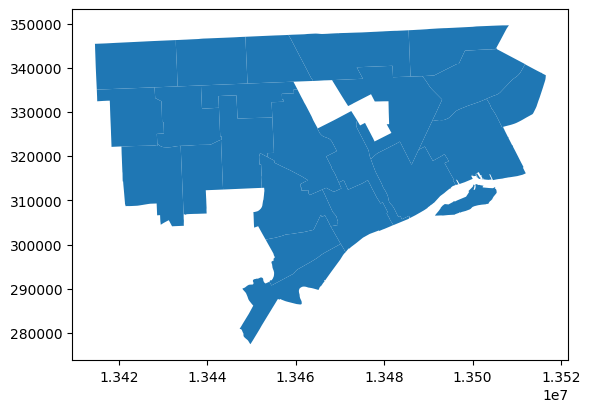

In [107]:
zones.plot()

In [111]:
svg_paths = [
    geom.svg(stroke_width=0.5)
    for geom in zones.geometry
]

svg_doc = (
    '<svg xmlns="http://www.w3.org/2000/svg" viewBox="0 0 1000 1000">\n' +
    "\n".join(svg_paths) +
    "\n</svg>"
)

with open("layer.svg", "w") as f:
    f.write(svg_doc)

TypeError: Polygon.svg() got an unexpected keyword argument 'stroke_width'

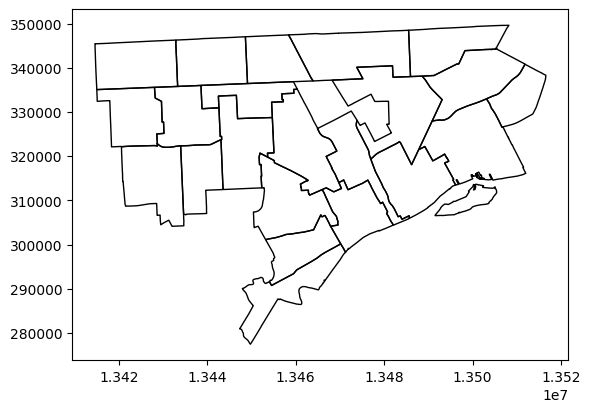

In [112]:
ax  = zones.plot(edgecolor="black", facecolor="none")  # or any styling you like
ax.get_figure().savefig("layer.svg", format="svg") 